In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from google.colab import files

In [3]:
uploaded=files.upload()

Saving DSC Whatsapp Chat.txt to DSC Whatsapp Chat.txt


In [4]:
file_name='DSC Whatsapp Chat.txt'
df=pd.read_csv(file_name,header=None,error_bad_lines=False,encoding='utf8')

b'Skipping line 15: expected 2 fields, saw 6\nSkipping line 19: expected 2 fields, saw 3\nSkipping line 46: expected 2 fields, saw 3\nSkipping line 54: expected 2 fields, saw 6\nSkipping line 55: expected 2 fields, saw 3\nSkipping line 63: expected 2 fields, saw 3\nSkipping line 65: expected 2 fields, saw 3\nSkipping line 83: expected 2 fields, saw 3\nSkipping line 87: expected 2 fields, saw 3\nSkipping line 102: expected 2 fields, saw 3\nSkipping line 117: expected 2 fields, saw 3\nSkipping line 119: expected 2 fields, saw 3\nSkipping line 146: expected 2 fields, saw 4\nSkipping line 166: expected 2 fields, saw 3\nSkipping line 171: expected 2 fields, saw 3\nSkipping line 190: expected 2 fields, saw 4\nSkipping line 201: expected 2 fields, saw 3\nSkipping line 207: expected 2 fields, saw 3\nSkipping line 252: expected 2 fields, saw 5\nSkipping line 262: expected 2 fields, saw 3\nSkipping line 264: expected 2 fields, saw 3\nSkipping line 281: expected 2 fields, saw 3\nSkipping line 415

In [5]:
#We drop the first row of the dataset that has "message encryption details" which is not needed,we then name the col as 'Date' and 'Chat'
df.drop([0,1,2],inplace=True)
df.columns=['Date','Chat']
#we eliminate the Nan values
df.dropna(inplace=True)

In [6]:
Message=df['Chat'].str.split("-",n=1,expand=True)

In [7]:
#From the dataset 'Chat' col has time,person name and message in the same col
#So we create the 'time' and 'text' col which is generated from the chat col
df['Time']=Message[0]
df['Text']=Message[1]

In [8]:
#The 'text' col creates another dataset because it consist of the chat person name and message,so we split it using ':' 
Message1=df['Text'].str.split(':',n=1,expand=True)

In [9]:
#so we now create a text col that contains only message and name col which contains name of the chat person and respective messages
df['Text']=Message1[1]
df['Name']=Message1[0]

In [10]:
#Now we delete the chat col and convert all the text to lower case for simplicity
df=df.drop(columns=['Chat'])
df['Text']=df['Text'].str.lower()

In [11]:
df=df[['Date','Time','Name','Text']]

In [15]:
df['Text']=df['Text'].str.replace('< media omitted>','MediaShared')
df['Text']=df['Text'].str.replace('this message was deleted','DeletedMsg')

In [17]:
#The person that sent the most message 
df['Name'].value_counts().head(1)


 Success DSC    1525
Name: Name, dtype: int64

In [38]:
#to determine the person that sent most message for each month
df['Months']=df['Date'].str.split('/',expand=True)[1]
df=df[['Date','Months','Time','Name','Text']]
mon=df.groupby(['Months','Name'])
mon=mon.count()

In [43]:
mon.sort_values(['Text','Months','Name'],ascending=False)
#The list of the messages sent by each person in the month of august and september


Date  Time  Text
Months Name                                
09      Success DSC        1452  1452  1452
        khok-maw'🚀          966   966   966
        Ire                 601   601   601
        RehobothEEE         336   336   336
        ‎Reserve DSC        332   332   332
        Lateef DSC          267   267   267
        +234 905 635 7349   200   200   200
        +234 902 590 5787   119   119   119
        Sir Fuad            112   112   112
        Avogrado            105   105   105
08      Ire                 103   103   103
        +234 701 095 0358    89    89    89
09      +234 701 095 0358    86    86    86
08      Success DSC          73    73    73
        Lateef DSC           63    63    63
09      Mosope DSC           55    55    55
08      khok-maw'🚀           40    40    40
09      +234 706 749 2346    36    36    36
08      +234 903 836 8530    34    34    34
09      Nifemi DSC           30    30    30
08      Avogrado             25    25    25
09      Engr Dee             23    23    23
08      +234 902 590 5787    22    22    22
09      Triumph DSC          19    19    19
08      RehobothEEE          18    18    18
09      +234 903 836 8530    17    17    17
08      Triumph DSC          16    16    16
        Nifemi DSC           16    16    16
        ‎Reserve DSC          9     9     9
        +234 905 635 7349     9     9     9
        Engr Dee              5     5     5
        +234 706 749 2346     4     4     4
09      +234 906 639 9274     2     2     2
08      Sir Fuad              2     2     2
        Mosope DSC            1     1     1

In [49]:
#The person that sent the most message in the month of september is Success DSC with 1452 messages
mon[mon['Text']==1452]

,,Date,Time,Text
Months,Name,,,
09,Success DSC,1452,1452,1452


In [50]:
#The person that sent the most message in the month of august is Ire with 103 messages
mon[mon['Text']==103]

,,Date,Time,Text
Months,Name,,,
08,Ire,103,103,103


In [55]:
#To drop the nan values present
df.dropna(inplace=True)
#To reset the index
df.reset_index(inplace=True)

In [53]:
#The first 10 rows of the dataframe
df.head(10)

,level_0,index,Date,Months,Time,Name,Text
0,0,0,26/08/2020,08,8:52 pm,Engr Dee,okay guys
1,1,1,26/08/2020,08,9:28 pm,Nifemi DSC,ok
2,2,2,26/08/2020,08,9:30 pm,RehobothEEE,yes sir
3,3,3,26/08/2020,08,11:37 pm,Mosope DSC,@mo_sopefoluwa
4,4,4,27/08/2020,08,12:46 am,+234 701 095 0358,please i need help urgently 🙏...how do i go a...
5,5,5,27/08/2020,08,12:47 am,khok-maw'🚀,pip --upgrade pip or so
6,6,6,27/08/2020,08,12:48 am,khok-maw'🚀,pip install --upgrade pip
7,7,7,27/08/2020,08,12:51 am,+234 701 095 0358,that my pip is already in 20.2.2
8,8,8,27/08/2020,08,12:53 am,khok-maw'🚀,<media omitted>
9,9,9,27/08/2020,08,12:55 am,+234 701 095 0358,bro i'm also confused too...even google self ...


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0, flags=flags)


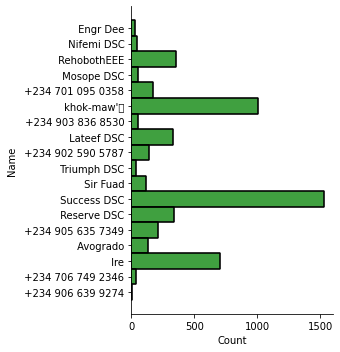

In [61]:
#Visualizing the total messages sent by each person using seaborn displot
sb.displot(y=df['Name'],color='g')